### Context

UK police forces collect data on every vehicle collision in the uk on a form called Stats19. Data from this form ends up at the DfT and is published at https://data.gov.uk/dataset/road-accidents-safety-data

### Content

There are 3 CSVs in this set. Accidents is the primary one and has references by Accident_Index to the casualties and vehicles tables. This might be better done as a database.

### Inspiration

Questions to ask of this data -

combined with population data, how do different areas compare?
    
    1. what trends are there for accidents involving different road users eg motorcycles, peds, cyclists
    
    2. are road safety campaigns effective?
    
    3. likelihood of accidents for different groups / vehicles many more..
  


In [11]:
import pandas as pd
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from warnings import filterwarnings

filterwarnings("ignore")
sns.set_theme()

print("imported")

imported


## LOADING DATA

In [76]:
# -- Accidents
location1 = "/Users/dineshkumaranbalagan/Desktop/IBM machine Learning/exploratory data analysis for machine learning/course project/project_dataset/Accidents0515.csv"
Accidents = pd.read_csv(location1)
Accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [24]:
print("number of rows present in a dataset    : {}".format(Accidents.shape[0]))
print("number of columns present in a dataset : {}".format(Accidents.shape[1]))

number of rows present in a dataset    : 1780653
number of columns present in a dataset : 32


In [25]:
Accidents.T

,0,1,2,3,4,5,6,7,8,9,...,1780643,1780644,1780645,1780646,1780647,1780648,1780649,1780650,1780651,1780652
Accident_Index,200501BS00001,200501BS00002,200501BS00003,200501BS00004,200501BS00005,200501BS00006,200501BS00007,200501BS00009,200501BS00010,200501BS00011,...,2015984135815,2015984136815,2015984137515,2015984137615,2015984139015,2015984139115,2015984139715,2015984140215,2015984140515,2015984141415
Location_Easting_OSGR,525680.0,524170.0,524520.0,526900.0,528060.0,524770.0,524220.0,525890.0,527350.0,524550.0,...,338928.0,324728.0,327369.0,319301.0,304440.0,312087.0,320671.0,311731.0,328273.0,314050.0
Location_Northing_OSGR,178240.0,181650.0,182240.0,177530.0,179040.0,181160.0,180830.0,179710.0,177650.0,180810.0,...,576364.0,566339.0,566993.0,566593.0,580166.0,570791.0,569791.0,586343.0,570137.0,579638.0
Longitude,-0.19117,-0.211708,-0.206458,-0.173862,-0.156618,-0.203238,-0.211277,-0.187623,-0.167342,-0.206531,...,-2.958098,-3.177818,-3.136722,-3.262676,-3.499388,-3.376671,-3.242159,-3.387067,-3.123385,-3.348646
Latitude,51.489096,51.520075,51.525301,51.482442,51.495752,51.51554,51.512695,51.50226,51.48342,51.512443,...,55.077953,54.985933,54.992202,54.987365,55.106659,55.023855,55.016316,55.163502,55.02058,55.103676
Police_Force,1,1,1,1,1,1,1,1,1,1,...,98,98,98,98,98,98,98,98,98,98
Accident_Severity,2,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,2,3,3
Number_of_Vehicles,1,1,2,1,1,2,2,1,2,2,...,2,1,2,2,1,3,2,1,3,13
Number_of_Casualties,1,1,1,1,1,1,1,2,2,5,...,1,2,1,1,1,1,1,4,3,7
Date,04/01/2005,05/01/2005,06/01/2005,07/01/2005,10/01/2005,11/01/2005,13/01/2005,14/01/2005,15/01/2005,15/01/2005,...,20/11/2015,24/11/2015,01/12/2015,02/12/2015,13/12/2015,11/12/2015,02/12/2015,23/12/2015,26/12/2015,31/12/2015


## PRELIMINARY ANALYSIS

In [26]:
Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780653 entries, 0 to 1780652
Data columns (total 32 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   Location_Easting_OSGR                        float64
 2   Location_Northing_OSGR                       float64
 3   Longitude                                    float64
 4   Latitude                                     float64
 5   Police_Force                                 int64  
 6   Accident_Severity                            int64  
 7   Number_of_Vehicles                           int64  
 8   Number_of_Casualties                         int64  
 9   Date                                         object 
 10  Day_of_Week                                  int64  
 11  Time                                         object 
 12  Local_Authority_(District)                   int64  
 13  Local_Author

In [31]:
Accidents["Date"] = Accidents["Date"].astype("datetime64[ns]")
Accidents["Day"] = Accidents["Date"].dt.day
Accidents["Month"] = Accidents["Date"].dt.month
Accidents["Year"] = Accidents["Date"].dt.year

In [37]:
Accidents["Time"] = Accidents["Time"].astype("datetime64[ns]")
Accidents.drop("Date", axis =1, inplace = True)

In [38]:
Accidents.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Day', 'Month', 'Year'],
      dtype='object')

In [45]:
nulls = (Accidents.isnull().sum()/Accidents.shape[0]).to_frame().rename(columns = {0:"null_percentage"})
nulls[nulls["null_percentage"]>0]

,null_percentage
Location_Easting_OSGR,0.000077
Location_Northing_OSGR,0.000077
Longitude,0.000077
Latitude,0.000077
Time,0.000085
LSOA_of_Accident_Location,0.072710


In [55]:
Accidents[Accidents.isnull().any(axis = 1)]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Day,Month,Year
37,200501BS70010,526940.0,177460.0,-0.173312,51.481804,1,3,2,1,1,...,1,1,0,0,1,1,NaN,2,6,2005
751,200501CP00011,533630.0,180150.0,-0.076006,51.504439,48,3,3,1,3,...,2,2,0,0,1,1,NaN,18,1,2005
828,200501CP00089,532820.0,180570.0,-0.087512,51.508404,48,3,1,1,6,...,2,2,0,0,1,1,NaN,15,4,2005
836,200501CP00098,531650.0,180710.0,-0.104309,51.509935,48,3,2,1,3,...,1,1,0,0,1,1,NaN,31,5,2005
884,200501CP00147,532820.0,180600.0,-0.087501,51.508673,48,3,2,1,3,...,1,1,0,2,1,1,NaN,19,7,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780648,2015984139115,312087.0,570791.0,-3.376671,55.023855,98,3,3,1,6,...,1,2,0,0,2,1,NaN,12,11,2015
1780649,2015984139715,320671.0,569791.0,-3.242159,55.016316,98,3,2,1,4,...,1,2,0,0,2,1,NaN,12,2,2015
1780650,2015984140215,311731.0,586343.0,-3.387067,55.163502,98,2,1,4,4,...,4,2,0,0,2,1,NaN,23,12,2015
1780651,2015984140515,328273.0,570137.0,-3.123385,55.020580,98,3,3,3,7,...,2,2,0,0,2,1,NaN,26,12,2015


In [58]:
Accidents[Accidents.isnull().any(axis = 1)].shape[0]/Accidents.shape[0]

0.07273230663133132

In [59]:
# -- since, the percentage of missing values is less than 10 percentage, I decided to drop em

Accidents.dropna(inplace = True)

In [69]:
Accidents.duplicated(keep=False).sum() # -- no duplicate entries

0

In [82]:
## -- casualties
location2 = "/Users/dineshkumaranbalagan/Desktop/IBM machine Learning/exploratory data analysis for machine learning/course project/project_dataset/Casualties0515.csv"
Casualities = pd.read_csv(location2,error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
Casualities.head()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,
200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [83]:
print("Number of rows present in a dataset    : {}".format(Casualities.shape[0]))
print("Number of columns present in a dataset : {}".format(Casualities.shape[1]))

Number of rows present in a dataset    : 2216720
Number of columns present in a dataset : 14


In [84]:
list(Vehicles.columns)

['Vehicle_Reference',
 'Vehicle_Type',
 'Towing_and_Articulation',
 'Vehicle_Manoeuvre',
 'Vehicle_Location-Restricted_Lane',
 'Junction_Location',
 'Skidding_and_Overturning',
 'Hit_Object_in_Carriageway',
 'Vehicle_Leaving_Carriageway',
 'Hit_Object_off_Carriageway',
 '1st_Point_of_Impact',
 'Was_Vehicle_Left_Hand_Drive?',
 'Journey_Purpose_of_Driver',
 'Sex_of_Driver',
 'Age_of_Driver',
 'Age_Band_of_Driver',
 'Engine_Capacity_(CC)',
 'Propulsion_Code',
 'Age_of_Vehicle',
 'Driver_IMD_Decile',
 'Driver_Home_Area_Type']

In [85]:
Vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3004425 entries, 200501BS00001 to 2014984139614
Data columns (total 21 columns):
 #   Column                            Dtype
---  ------                            -----
 0   Vehicle_Reference                 int64
 1   Vehicle_Type                      int64
 2   Towing_and_Articulation           int64
 3   Vehicle_Manoeuvre                 int64
 4   Vehicle_Location-Restricted_Lane  int64
 5   Junction_Location                 int64
 6   Skidding_and_Overturning          int64
 7   Hit_Object_in_Carriageway         int64
 8   Vehicle_Leaving_Carriageway       int64
 9   Hit_Object_off_Carriageway        int64
 10  1st_Point_of_Impact               int64
 11  Was_Vehicle_Left_Hand_Drive?      int64
 12  Journey_Purpose_of_Driver         int64
 13  Sex_of_Driver                     int64
 14  Age_of_Driver                     int64
 15  Age_Band_of_Driver                int64
 16  Engine_Capacity_(CC)              int64
 17  Propulsion_Cod

In [86]:
Vehicles.isnull().sum() # - checking null values

Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
dtype: int64

In [91]:
Vehicles.duplicated(keep = False).sum()

0

In [90]:
Vehicles.drop_duplicates(inplace = True) # -- dropping all the duplicate records

## PERFORMING EXPLORATORY DATA ANALYSIS

In [60]:
## --  speed limit at which most of the accidents have occured:

Accidents["Speed_limit"].nunique()

9

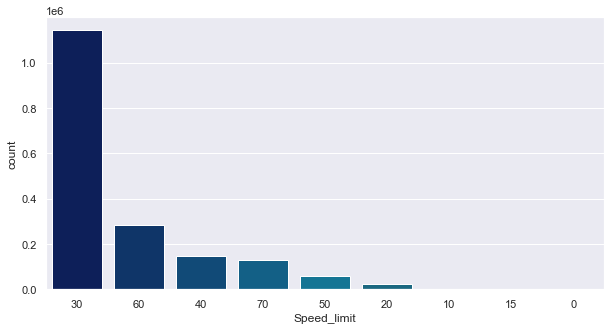

In [102]:
plt.figure(figsize = (10,5))
sns.countplot(
    Accidents["Speed_limit"], 
    order = Accidents["Speed_limit"].value_counts().index,
    palette = "ocean_d"
)
plt.show()

[]

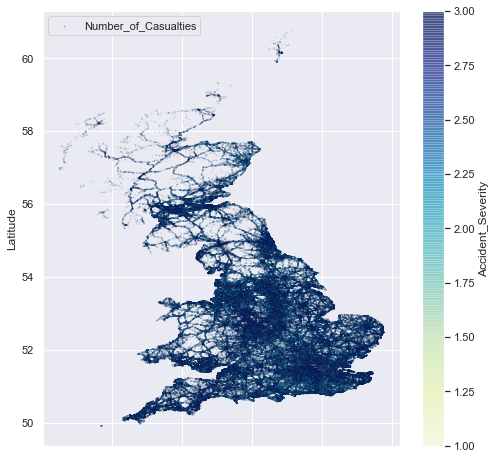

In [105]:
'''

    NOTE: I tried to use folium maps for this geospatial analysis, but since the github doesn't
    
    support the view of folium maps in notebooks, I simply used x and y axis as long and lat for
    
    presentation.

'''

Accidents.plot(kind = "scatter", x = "Longitude", y = "Latitude", alpha = 0.5,
             s = Accidents["Number_of_Casualties"]/100, label = "Number_of_Casualties", figsize=(8,8),
             c = "Accident_Severity", cmap = plt.get_cmap("YlGnBu"), colorbar= True
             )
plt.legend()
plt.plot()

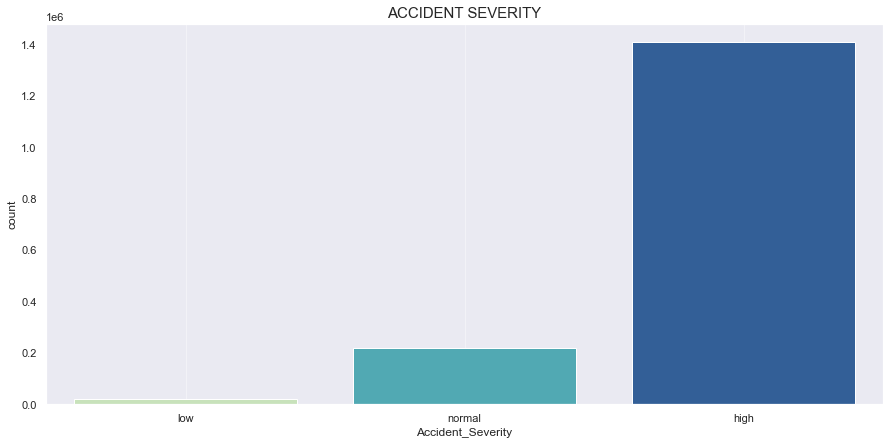

In [72]:
plt.figure(figsize=(15,7))
ax=sns.countplot(Accidents['Accident_Severity'], palette = "YlGnBu")
plt.title('ACCIDENT SEVERITY', fontsize=15)
ax.set_xticklabels(['low','normal','high'])
plt.grid(alpha=0.4)

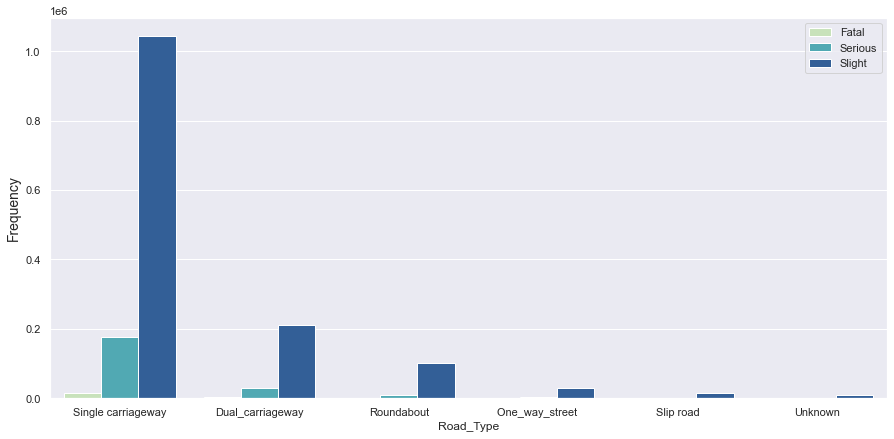

In [73]:
plt.figure(figsize=(15,7))
ax = sns.countplot('Road_Type',hue='Accident_Severity',data=Accidents, 
                   order = Accidents["Road_Type"].value_counts().index, palette = "YlGnBu")
ax.set_xticklabels(['Single carriageway','Dual_carriageway','Roundabout',
                    'One_way_street ',
                    'Slip road','Unknown'])
plt.legend(['Fatal','Serious','Slight'])
plt.ylabel("Frequency", fontsize = 14)
plt.show()

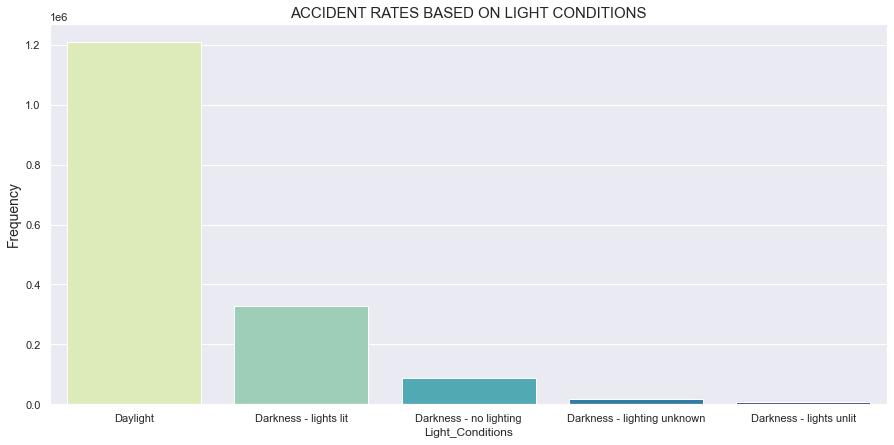

In [74]:
plt.figure(figsize=(15,7))
ax=sns.countplot('Light_Conditions',data=Accidents,
                 order = Accidents["Light_Conditions"].value_counts().index,
                 palette = "YlGnBu") 
ax.set_xticklabels(['Daylight','Darkness - lights lit',
                    'Darkness - no lighting',
                    'Darkness - lighting unknown',
                    'Darkness - lights unlit'])
plt.title('ACCIDENT RATES BASED ON LIGHT CONDITIONS',fontsize=15)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

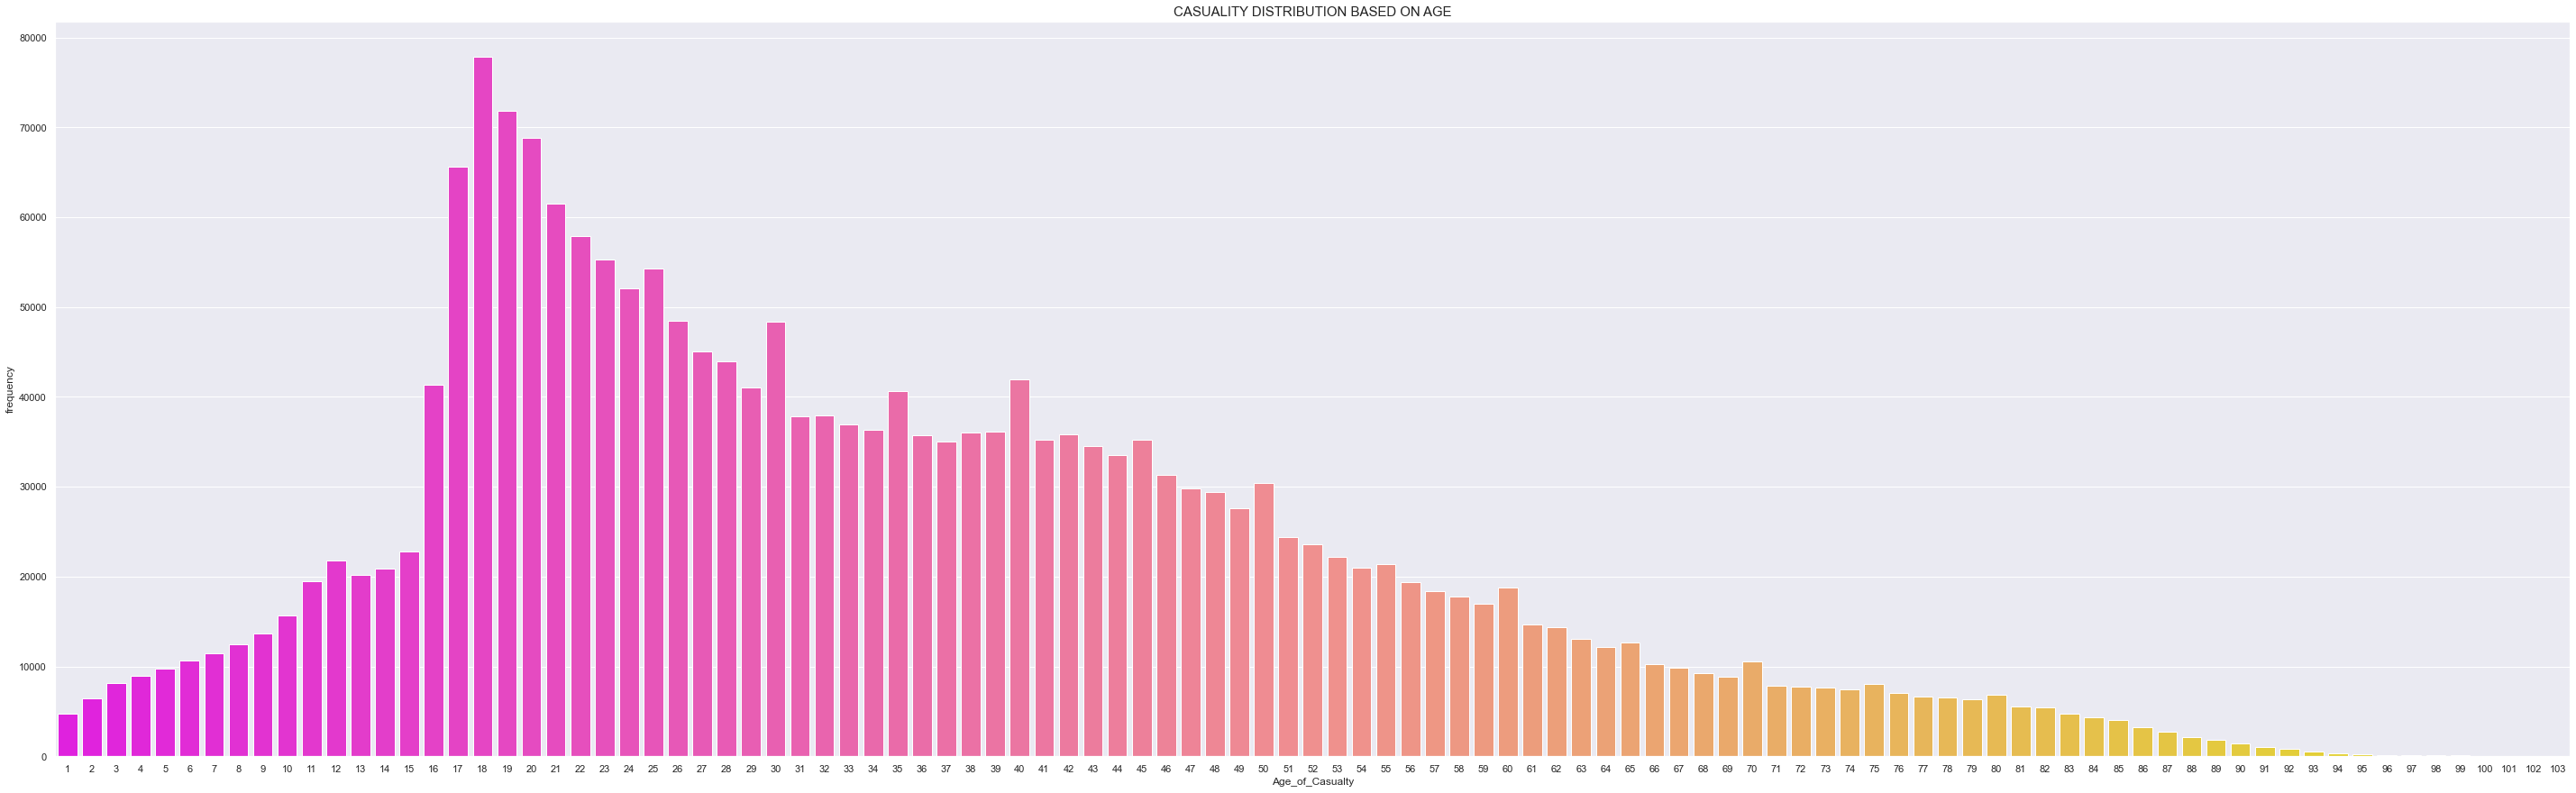

In [96]:
plt.figure(figsize=(50,15))
sns.countplot('Age_of_Casualty',data=Casualities[Casualities["Age_of_Casualty"]>0], palette = "spring")
plt.title('CASUALITY DISTRIBUTION BASED ON AGE', fontsize=15)
plt.ylabel("frequency", fontsize = 12)
plt.show()

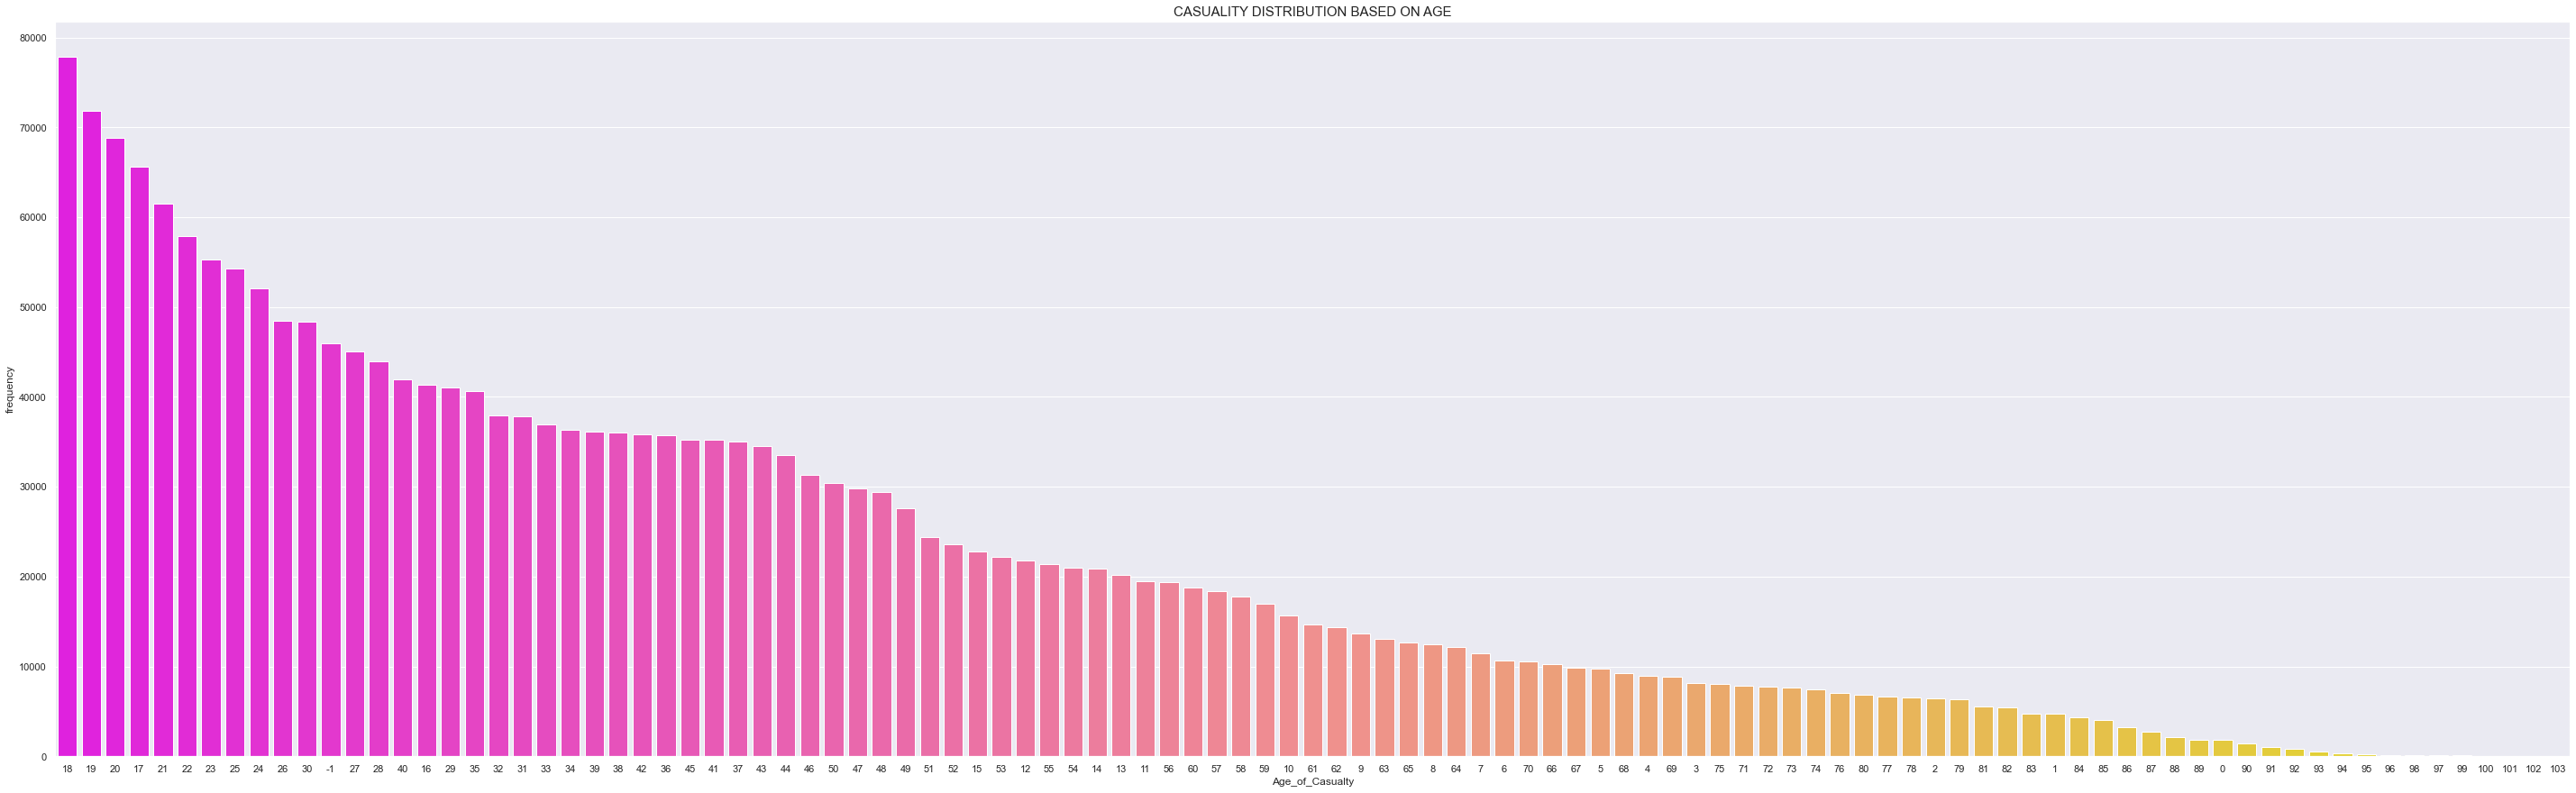

In [95]:
#Distrubution of casualities based on age:
plt.figure(figsize=(50,15))
sns.countplot(x = 'Age_of_Casualty',data=Casualities, 
              order = Casualities["Age_of_Casualty"].value_counts().index, 
              palette = "spring")
plt.title('CASUALITY DISTRIBUTION BASED ON AGE', fontsize=15)
plt.ylabel("frequency", fontsize = 12)
plt.show()

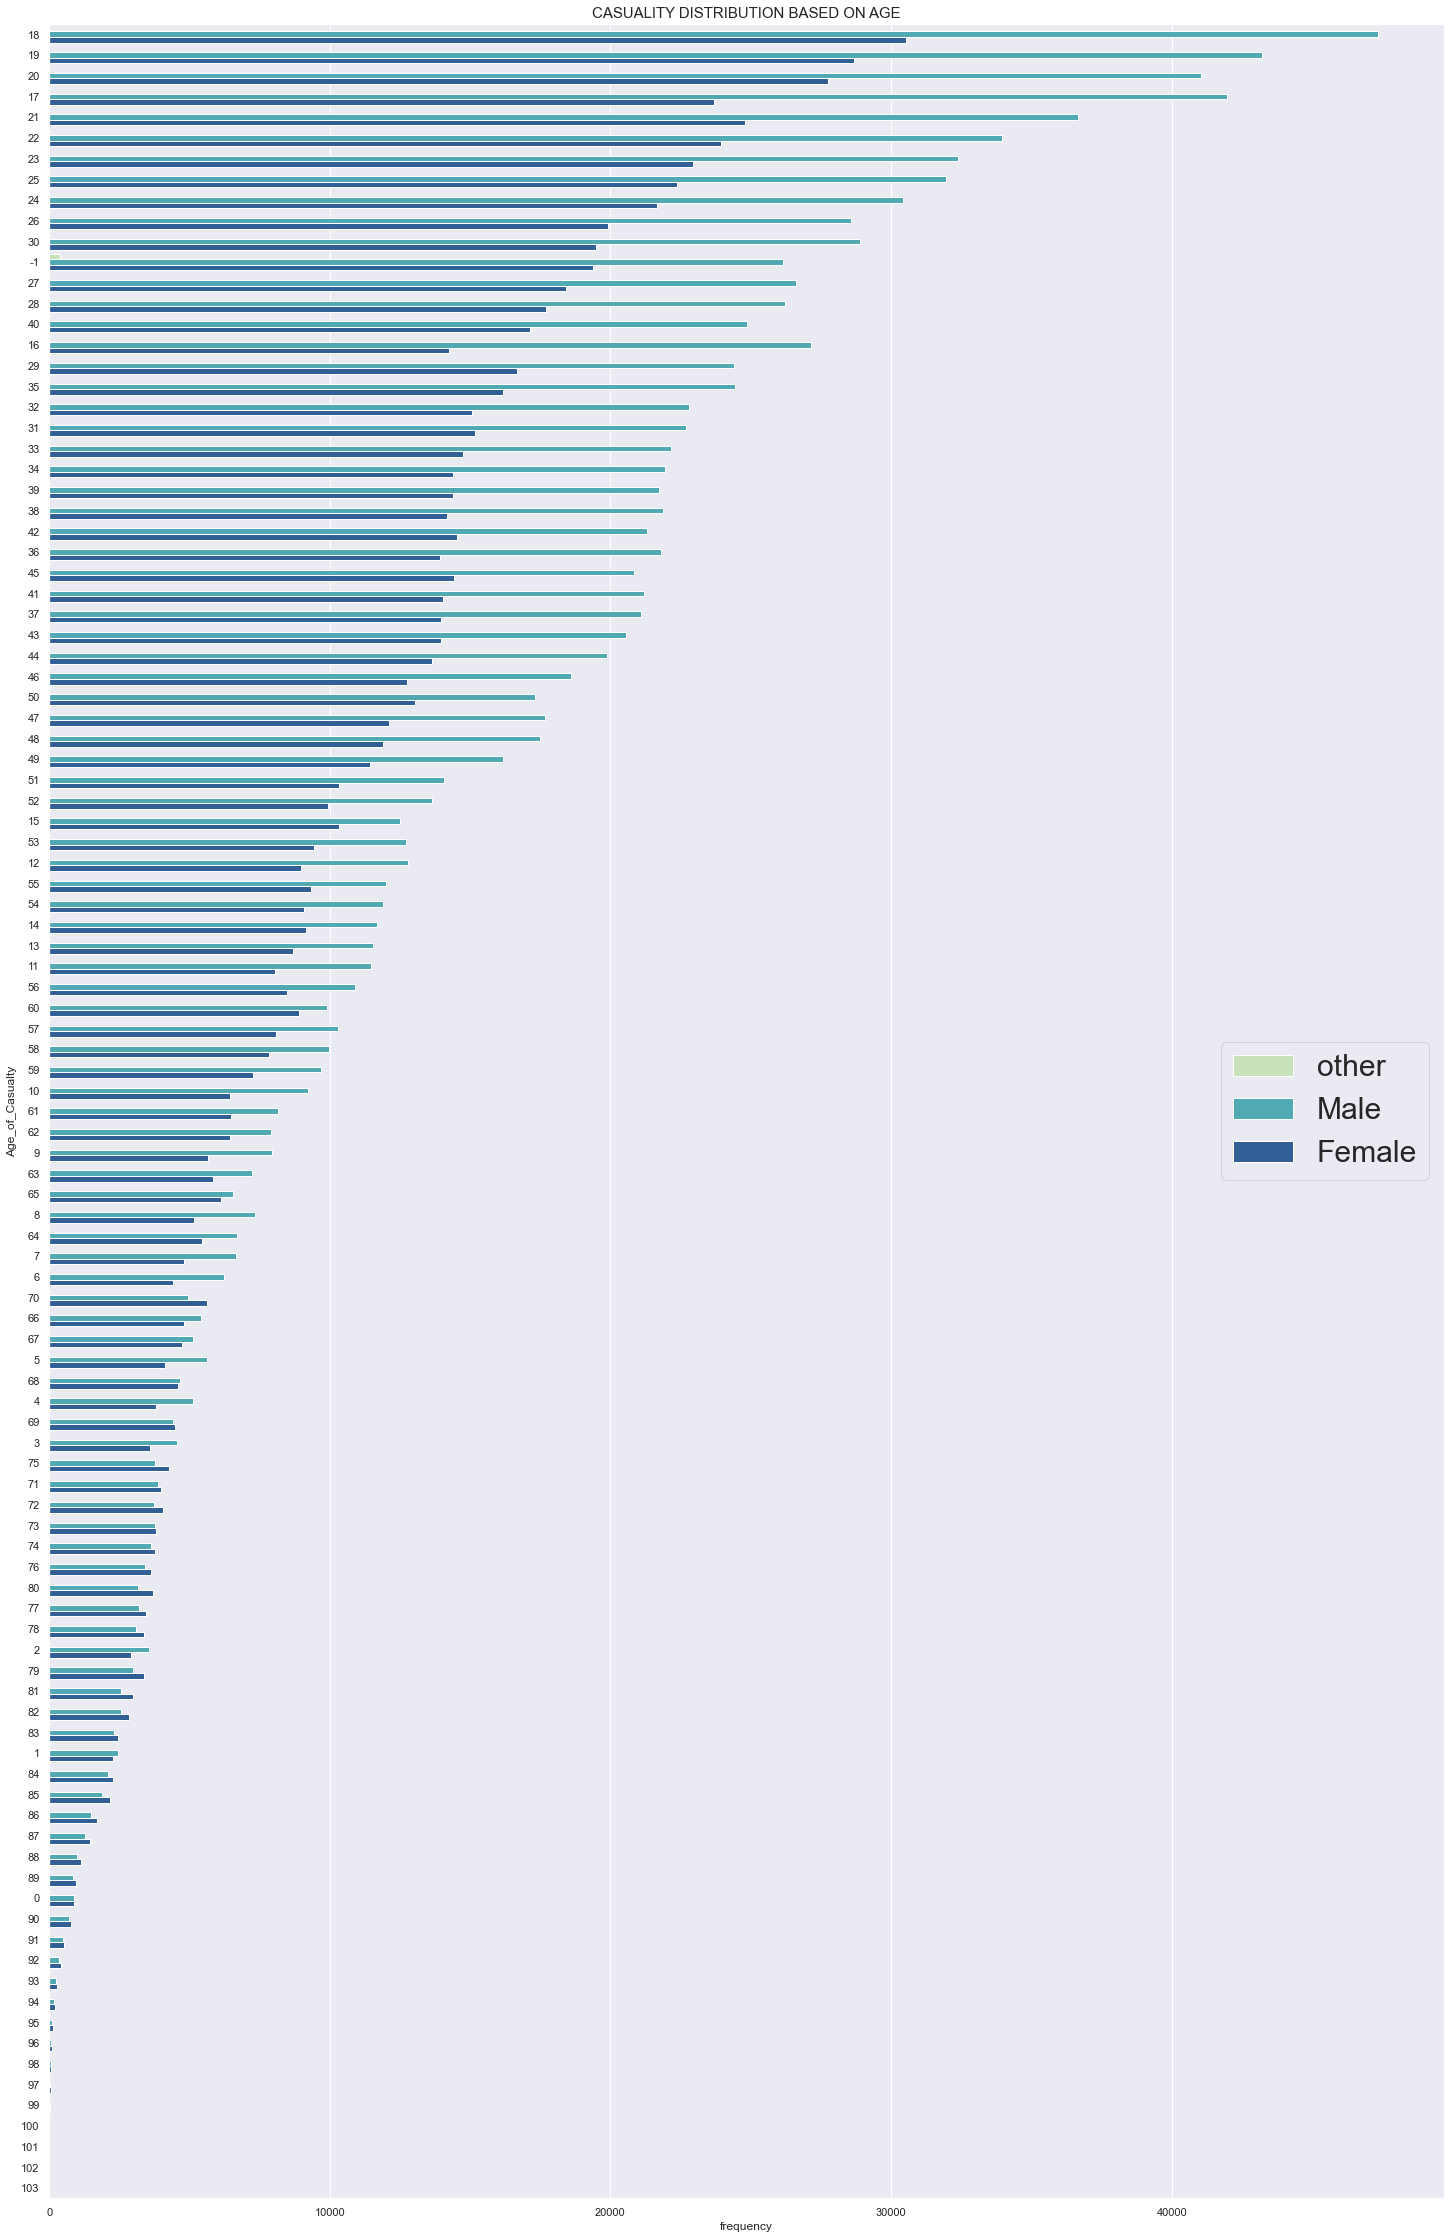

In [97]:
plt.figure(figsize=(25,40))
sns.countplot(y = 'Age_of_Casualty', hue = "Sex_of_Casualty",
              data=Casualities, 
              order = Casualities["Age_of_Casualty"].value_counts().index, 
              palette = "YlGnBu")
plt.title('CASUALITY DISTRIBUTION BASED ON AGE', fontsize=15)
plt.legend(['other','Male','Female'],prop={'size': 30}, loc=0)
plt.xlabel("frequency", fontsize = 12)
plt.show()

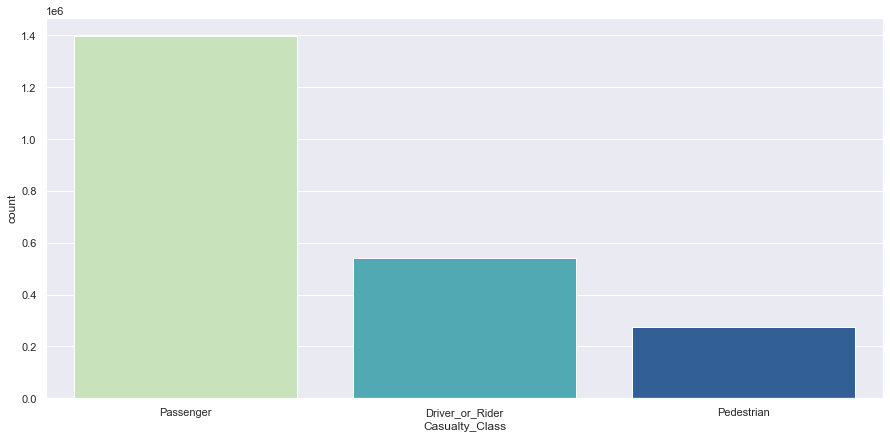

In [98]:
plt.figure(figsize = (15,7))
ax=sns.countplot('Casualty_Class', data=Casualities, palette = "YlGnBu",order = Casualities["Casualty_Class"].value_counts().index)
ax.set_xticklabels(['Passenger','Driver_or_Rider','Pedestrian'])
plt.show()

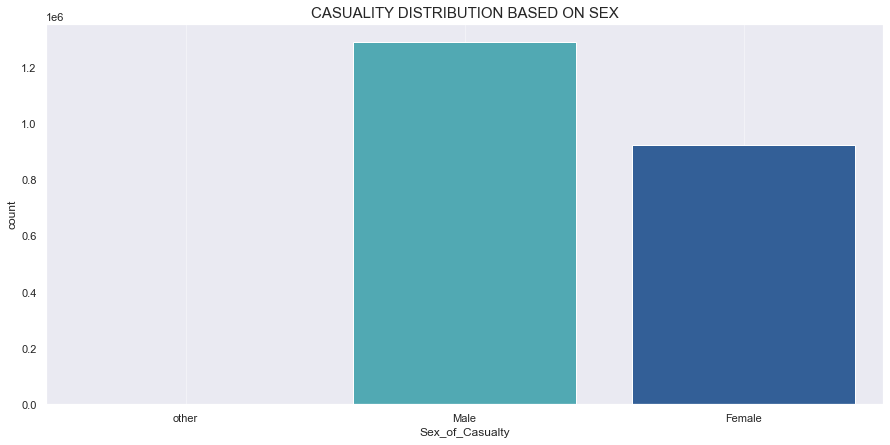

In [99]:
plt.figure(figsize=(15,7))
ax=sns.countplot(Casualities['Sex_of_Casualty'], palette = "YlGnBu")
plt.title('CASUALITY DISTRIBUTION BASED ON SEX', fontsize=15)
ax.set_xticklabels(['other','Male','Female'])
plt.grid(alpha=0.4)

In [ ]:
'''

FINDINGS SUMMARY:

    From the above analyses, it is very much clear that most of the accidents which occured within the 
    
    provided regions of united kingdom falls under the age group of 17-21, and notably most of them
    
    are males. Furthermore, it also clearly shows that most of the accidents are occured during daytime 
    
    at a single carriageway. 
    
    Most of the victims of these car accidents are drivers and most of them are males.

'''

## HYPOTHESIS FORMATIONS

In [107]:
Casualities

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,
200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014984137714,1,1,2,2,16,4,3,0,0,2,0,0,9,1
2014984138414,1,1,1,1,27,6,3,0,0,0,0,0,9,1
2014984138414,2,2,1,1,44,7,2,0,0,0,0,0,19,1


In [108]:
# -- hypothesis 1

'''

Hypothesis formation:

    Ho : age_of_casualty is normal.
    
    Ha : age_of_casualty is not normal.

'''

st.shapiro(Casualities["Age_of_Casualty"])

ShapiroResult(statistic=0.974646806716919, pvalue=0.0)

In [ ]:
# -- p_value is less than significance level (0.05)
# -- Hence, alternate hypotheis is selected and null hypothesis is rejected.
# -- Hence, age_of_casualty is not normal

In [114]:
# -- hypothesis 2

'''

    Ho : Casualty_Home_Area_Type = Casualty_Type (dependent)

    Ha : Casualty_Home_Area_Type != Casualty_Type (independent)
    
'''

cross = pd.crosstab(Casualities["Casualty_Home_Area_Type"],Casualities["Casualty_Type"])

test_stat, p_val, dof, exp = st.chi2_contingency(cross)
print(f"test_stat          : {test_stat}")
print(f"p_value            : {p_val}")
print(f"degrees of freedom : {dof}")
print(f"expected           :\n\n {exp}")

test_stat          : 56343.015326136476
p_value            : 0.0
degrees of freedom : 60
expected           :

 [[4.01610368e+04 2.59906466e+04 5.02331421e+03 9.65079039e+03
  3.54609151e+03 1.24829467e+04 4.40153258e+03 1.99277153e+05
  1.08109350e+03 9.20778372e+03 1.70185605e+02 1.69457694e+02
  1.52861322e+01 7.25363369e+03 8.89507313e+02 1.77158993e+03
  5.05170274e+01 2.62047981e+00 1.52904997e+03 3.04266822e+01
  1.03363370e+01]
 [1.85688063e+05 1.20170026e+05 2.32257322e+04 4.46212726e+04
  1.63956639e+04 5.77159949e+04 2.03508705e+04 9.21375329e+05
  4.99853027e+03 4.25729926e+04 7.86868016e+02 7.83502456e+02
  7.06767679e+01 3.35378092e+04 4.11271478e+03 8.19110085e+03
  2.33569890e+02 1.21160174e+01 7.06969613e+03 1.40680424e+02
  4.77909574e+01]
 [2.23322071e+04 1.44525279e+04 2.79329674e+03 5.36648122e+03
  1.97186269e+03 6.94134848e+03 2.44754481e+03 1.10811349e+05
  6.01159879e+02 5.12014005e+03 9.46345136e+01 9.42297467e+01
  8.50010601e+00 4.03350269e+03 4.94625217e+02

In [ ]:
'''

inference : 
    
    * p_value < sig_lvl.
    
    * Alternate hypothesis is selected and Null hypothesis is rejected.
    
    * Hence, Casualty_Home_Area_Type != Casualty_Type i.e they are independent and there is a pattern.

'''

In [120]:
# -- hypothesis 3:

'''

    Ho : Day_of_Week = Number_of_Casualties (dependent)

    Ha : Day_of_Week != Number_of_Casualties (independent)
    
'''

cross = pd.crosstab(Accidents["Day_of_Week"],Accidents["Number_of_Casualties"])
cross

Number_of_Casualties,1,2,3,4,5,6,7,8,9,10,...,47,48,51,54,62,63,68,70,87,93
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
1,140900,34804,11553,4868,1918,764,280,114,56,26,...,0,0,0,0,0,0,0,0,0,0
2,196962,39693,10808,3590,1382,495,145,67,44,19,...,0,0,0,0,1,1,0,0,1,1
3,209532,40779,10768,3672,1220,417,141,66,29,19,...,0,1,0,1,0,0,0,0,1,0
4,210687,41043,10978,3616,1271,438,172,67,38,22,...,0,0,0,0,0,0,1,0,0,0
5,209113,41358,11106,3838,1272,480,148,66,31,17,...,1,0,0,0,0,0,0,1,0,0
6,224607,46471,12960,4542,1711,638,202,83,47,27,...,0,0,1,0,0,0,0,0,0,0
7,175605,40763,13076,5193,2088,809,314,139,48,27,...,0,0,1,0,0,0,0,0,0,0


In [122]:
test_stat, p_val, dof, exp = st.chi2_contingency(cross)
print(f"test_stat          : {test_stat}")
print(f"p_value            : {p_val}")
print(f"degrees of freedom : {dof}")
print(f"expected           :\n\n {exp}")

test_stat          : 7490.742897986933
p_value            : 0.0
degrees of freedom : 300
expected           :

 [[1.49995504e+05 3.12528752e+04 8.91248445e+03 3.21610274e+03
  1.19149043e+03 4.43271298e+02 1.53790240e+02 6.60354668e+01
  3.21401857e+01 1.72218742e+01 1.11887336e+01 5.92344718e+00
  5.26528639e+00 3.40049746e+00 2.30356279e+00 2.19386933e+00
  2.19386933e+00 1.20662813e+00 1.42601506e+00 4.38773866e-01
  1.09693466e+00 1.20662813e+00 4.38773866e-01 5.48467332e-01
  4.38773866e-01 7.67854265e-01 3.29080399e-01 2.19386933e-01
  6.58160798e-01 1.09693466e-01 1.09693466e-01 1.09693466e-01
  2.19386933e-01 4.38773866e-01 2.19386933e-01 2.19386933e-01
  2.19386933e-01 3.29080399e-01 2.19386933e-01 2.19386933e-01
  1.09693466e-01 1.09693466e-01 1.09693466e-01 2.19386933e-01
  1.09693466e-01 1.09693466e-01 1.09693466e-01 1.09693466e-01
  1.09693466e-01 2.19386933e-01 1.09693466e-01]
 [1.94492087e+05 4.05241274e+04 1.15563977e+04 4.17016854e+03
  1.54494938e+03 5.74768958e+02 1.

In [ ]:
'''

inference : 
    
    * p_value < sig_lvl.
    
    * Alternate hypothesis is selected and Null hypothesis is rejected.
    
    * Hence, Day_of_Week != Number_of_Casualties i.e. they are independent and there is a pattern.

'''

In [ ]:
'''

SUMMARY:

    From all of the above analyses, we can conclude that the dataset is reliable and it covers most of
    
    the significant reasons which corresponds to the road accidents happening in the UK region today.
    
    
    However, due to time constraints I didn't compare each and every columns in the dataset with all
    
    the other columns in it. But, by looking at the nature of every features present in the dataset, 
    
    it is clear that more than 90 percent of the features in the table are highly signifcant - significant
    
    enough to get to the route cause of the today's road accidents in UK.
    
    

'''

## *Thank you...* 
##### - Dineshkumar Anbalagan